<h1 align="center"><font></font>HEART DISEASE CLASSIFICATION</h1>

In [64]:
## Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [65]:
## Importation de la base de données
data = pd.read_csv("./heart.csv")

## Analyse Exploratoire

In [66]:
## Duplication de la base pour
## l'analyse exploratoires
data_b = data.astype({"HeartDisease":"str"})
data_b = data.astype({"FastingBS":"str"})

In [67]:
## Overview sur la structuration
## de la base de données
data_b.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [68]:
## Overview sur les dimensions 
## de la base de données
data_b.shape
## Il s'agit d'une base avec
## 918 individus et 12 variables

(918, 12)

In [69]:
## overview sur les variables
data_b.info()
## La base de données compte 12
## variables dont 7 qualitatives (en incluant)
## la variable HeartDisease et 5 quantitatives
## De plus Aucune de ces variables ne comporte
## de valeurs manquantes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 86.2+ KB


In [70]:
## Overview sur la distribution des 
## variables qualitatives
data_b.describe(include='O')

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918,918
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,725,496,704,552,547,460


In [71]:
## Overview sur la distribution des 
## variables quantitatives
data_b.describe().apply(lambda x: np.round(x))

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.0,918.0,918.0,918.0,918.0,918.0
mean,54.0,132.0,199.0,137.0,1.0,1.0
std,9.0,19.0,109.0,25.0,1.0,0.0
min,28.0,0.0,0.0,60.0,-3.0,0.0
25%,47.0,120.0,173.0,120.0,0.0,0.0
50%,54.0,130.0,223.0,138.0,1.0,1.0
75%,60.0,140.0,267.0,156.0,2.0,1.0
max,77.0,200.0,603.0,202.0,6.0,1.0


In [72]:
## Détermination et suppression des doublons
data_b[data_b.duplicated(keep="first")]
## Ainsi, il n'y aucun doublon dans cette base

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


### Analyse univariée 

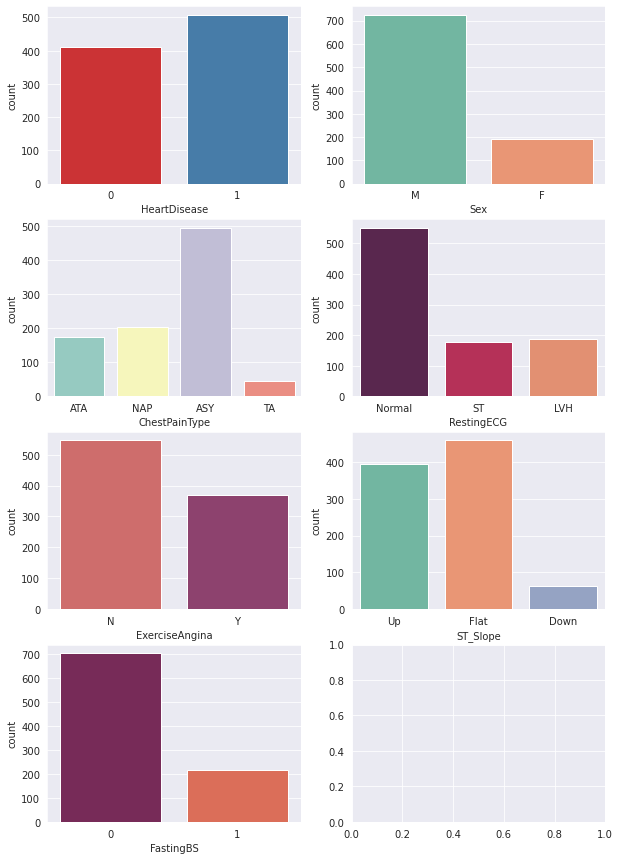

In [73]:
## Analyse univariée des variables qualitatives
sns.set_style("darkgrid")
figure, ax = plt.subplots(4,2, figsize=(10,15))
sns.countplot("HeartDisease", data=data_b, palette="Set1", ax=ax[0, 0])
sns.countplot("Sex", data=data_b, palette="Set2", ax=ax[0,1])
sns.countplot("ChestPainType", data=data_b, palette="Set3", ax=ax[1,0])
sns.countplot("RestingECG", data=data_b, palette="rocket", ax=ax[1,1])
sns.countplot("ExerciseAngina", data=data_b, palette="flare", ax=ax[2,0])
sns.countplot("ST_Slope", data=data_b, palette="Set2", ax=ax[2,1])
sns.countplot("FastingBS", data=data_b, palette="rocket", ax=ax[3,0])
figure.show()

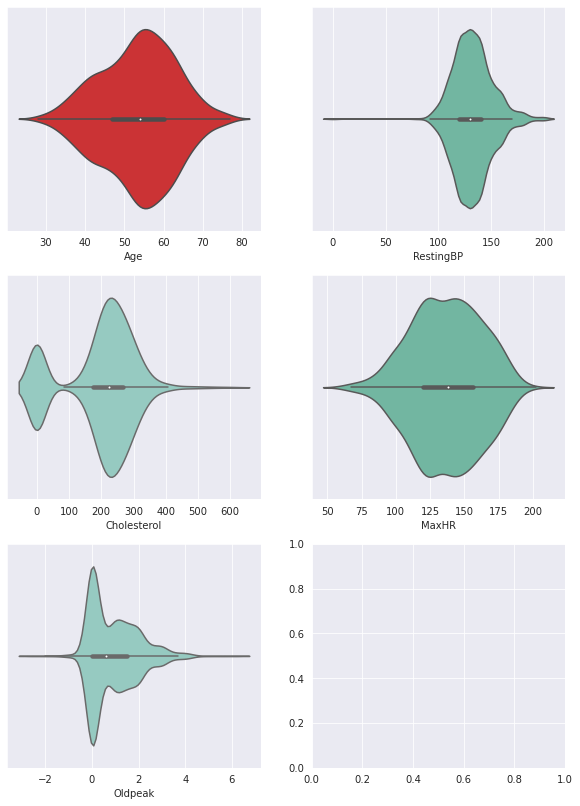

In [74]:
## Analyse univariée des variables quantitatives
fig, axes = plt.subplots(3,2, figsize=(10,14))
sns.violinplot("Age", data=data_b, palette="Set1", ax=axes[0,0])
sns.violinplot("RestingBP", data=data_b, palette="Set2", ax=axes[0,1])
sns.violinplot("Cholesterol", data=data_b, palette="Set3", ax=axes[1,0])
sns.violinplot("MaxHR", data=data_b, palette="Set2", ax=axes[1,1])
sns.violinplot("Oldpeak", data=data_b, palette="Set3", ax=axes[2,0])
fig.show()

Les ViolinPlots qui sont une combinaison du box plot et  
du kernel density plot et plus informatifs que ceux-ci   
nous montrent que les variables: 
- RestingBP 
- Oldpeak
- Cholesterol  

présentent des valeurs extrêmes. De plus, l'age ainsi que  
MaxHR ont une distribution suivant la loi normale

### Analyse Croisée

Nous ferons les analyses suivantes en distinguant  
les sexes étant donné la prépondérance des hommes  
dans la base, il parait judicieux d'analyser en  
distinguant les sexes afin de mieux comprendre la  
distribution du phénomène

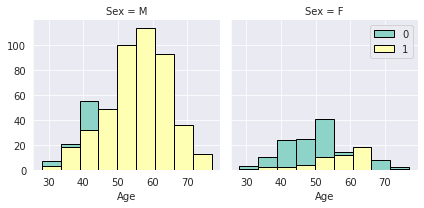

In [75]:
## Age vs HeartDisease by Sex
bins = np.linspace(data_b.Age.min(), data_b.Age.max(), 10)
g = sns.FacetGrid(data_b, col="Sex", hue="HeartDisease", palette="Set3", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

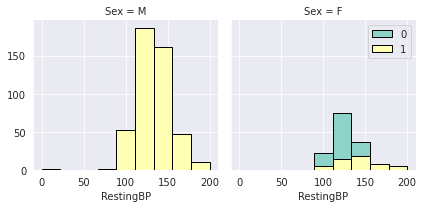

In [76]:
## RestingBP vs HeartDisease by Sex
bins = np.linspace(data_b.RestingBP.min(), data_b.RestingBP.max(), 10)
g = sns.FacetGrid(data_b, col="Sex", hue="HeartDisease", palette="Set3", col_wrap=2)
g.map(plt.hist, 'RestingBP', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

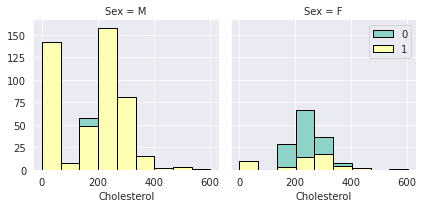

In [77]:
## Cholesterol vs HeartDisease by Sex
bins = np.linspace(data_b.Cholesterol.min(), data_b.Cholesterol.max(), 10)
g = sns.FacetGrid(data_b, col="Sex", hue="HeartDisease", palette="Set3", col_wrap=2)
g.map(plt.hist, 'Cholesterol', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

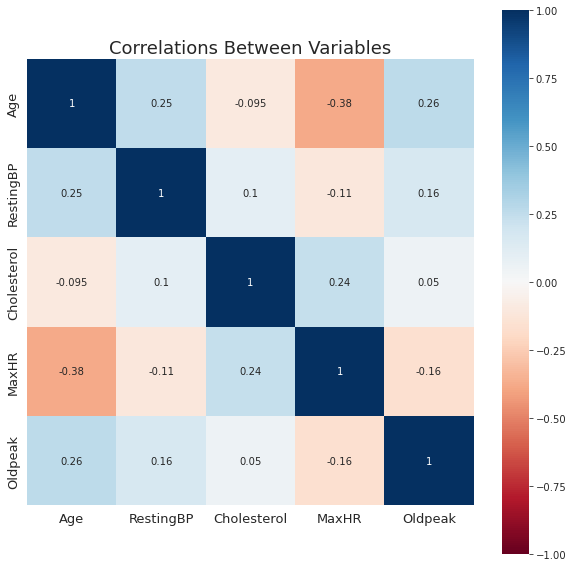

In [79]:
var_quants = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
plt.figure(figsize = (10,10))
sns.heatmap(data_b[var_quants].corr(),annot=True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)
plt.show()

## Preprocessing des données

In [81]:
data_b = data.copy()

#### Winsorization des valeurs extrêmes

In [82]:
## Traitement des valeurs extremes 
## par winsorization. Cette méthode
## consiste à remplacer les valeurs
## extrêmes par les valeurs des quantiles
## d'ordre 0.05 et 0.095
var_outliers = ["RestingBP", "Cholesterol","Oldpeak"]
data_b[var_outliers] = data_b[var_outliers].apply(lambda x: winsorize(x, limits=[.05, .05]))

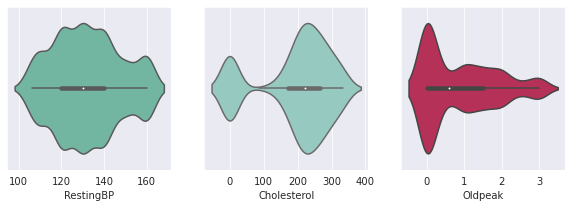

In [83]:
## On affiche les violinplot des variables modifiées
## affin de s'assurer qu'il n'y ait plus de valeurs extrêmes
fig, axes = plt.subplots(1,3, figsize=(10,3))
sns.violinplot("RestingBP", data=data_b, palette="Set2", ax=axes[0])
sns.violinplot("Cholesterol", data=data_b, palette="Set3", ax=axes[1])
sns.violinplot("Oldpeak", data=data_b, palette="rocket", ax=axes[2])
fig.show()

#### Standardisation des variables quantitatives

In [84]:
var_quants = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
for var in var_quants:
    scale = StandardScaler()
    data_b[var] = scale.fit_transform(data_b[[var]]) 

#### One Hot Encoding

In [85]:
data_b = pd.get_dummies(data_b, drop_first=True)

In [86]:
## Affichage de la nouvelle base
## de données
data_b.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.517573,0.892864,0,1.382928,-0.905208,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.807466,-0.154065,0,0.754157,0.131962,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.127373,0.835235,0,-1.525138,-0.905208,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.388584,0.172500,0,-1.132156,0.650548,1,0,0,0,0,1,0,1,1,0
4,0.051881,1.162520,-0.009992,0,-0.581981,-0.905208,0,1,0,1,0,1,0,0,0,1


In [22]:
## Affichage des variables nouvellement
## crées
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(5), int64(2), u

### Feature Selection

In [102]:
## Entrainement d'une regression logistique
x_train, x_test, y_train, y_test = train_test_split(data_b.drop("HeartDisease", axis=1), 
                                                    data_b["HeartDisease"],
                                                    shuffle=True)

model_xgb0 = xgb.XGBClassifier()
model_xgb0.fit(x_train, y_train)
print(f1_score(model_xgb0.predict(x_test), y_test))

0.8582995951417004


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

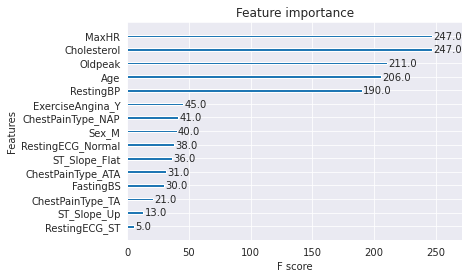

In [103]:
xgb.plot_importance(model_xgb0)

Ainsi, au sens du F-Score, les variable les plus importantes sont
les suivantes : 
- MaxHR
- Cholesterol
- Oldpeak
- Age
- RestingBP

De plus, nous décidons de concerver toutes les variables car, nous  
analyserons plus en détail leur importance dans la prédiction dans  
la suite du travail

### Automatisation du preprocessing

In [24]:
def preprocessing_df(data):
    """
    Fonction permettant d'effectuer
    le prétraitement des données d'une
    base présentant les mêmes caractéristiques
    que la base heart.csv afin de pouvoir réaliser
    les prédictions.
    """
    train = pd.read_csv("./heart.csv")
    ## Winsorization des valeurs extrêmes
    var_outliers = ["RestingBP", "Cholesterol","Oldpeak"]
    q = np.quantile(train[var_outliers], [.05, .95], axis=0)
    winsorize1 = lambda x: q[0,0]*(x<q[0,0]) + q[1,0]*(x>q[1,0]) if x<q[0,0] or x>q[1,0] else x
    winsorize2 = lambda x: q[0,1]*(x<q[0,1]) + q[1,1]*(x>q[1,1]) if x<q[0,1] or x>q[1,1] else x
    winsorize3 = lambda x: q[0,2]*(x<q[0,2]) + q[1,2]*(x>q[1,2]) if x<q[0,2] or x>q[1,2] else x

    data["RestingBP"] = data["RestingBP"].\
        apply(lambda x: winsorize1(x))
    data["Cholesterol"] = data["Cholesterol"].\
        apply(lambda x: winsorize2(x))
    data["Oldpeak"] = data["Oldpeak"].\
        apply(lambda x: winsorize3(x))
    
    var_quants = ["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"]
    ## Standardisation des variables quantitatives par l'algorithme
    ## StandardScaler de la librairie Scikit Learn
    scale1, scale2, scale3 = StandardScaler().fit(train[["Age"]]),\
                             StandardScaler().fit(train[["RestingBP"]]),\
                             StandardScaler().fit(train[["Cholesterol"]])
                             
    scale4, scale5 = StandardScaler().fit(train[["MaxHR"]]),\
                     StandardScaler().fit(train[["Oldpeak"]])
    
    data["Age"] = scale1.transform(data[["Age"]])
    data["RestingBP"] = scale2.transform(data[["RestingBP"]])
    data["Cholesterol"] = scale3.transform(data[["Cholesterol"]])
    data["MaxHR"] = scale4.transform(data[["MaxHR"]])
    data["Oldpeak"] = scale5.transform(data[["Oldpeak"]])

    ## One Hot Encoding des variables qualitatives
    data = pd.get_dummies(data, drop_first=True)

    return data

## Tuning des modèles

Les modèles auxquels nous nous intéresserons  
dans cette section sont:  
- regression logistique
- random forest
- xgboost
- KNN

In [97]:
## Copie de la base de donnée initiale 
tuning_df = preprocessing_df(data)

x_train, x_test, y_train, y_test = train_test_split(tuning_df.drop("HeartDisease",axis=1),
                                                    tuning_df["HeartDisease"],
                                                    shuffle=True)

#### Tuning regression logistique

In [26]:
params_log = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": np.linspace(0, 1, 10),
    "solver": ["newto-cg", "lbfgs",'liblinear',"saga"]
}

log = GridSearchCV(LogisticRegression(), params_log,
                   scoring="f1", cv=5, n_jobs=-2)
log.fit(x_train, y_train)
params_log = log.best_params_
print("best score : ", log.best_score_)

/home/koffie/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:487: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C
/home/koffie/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:487: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C
/home/koffie/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:487: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C
/home/koffie/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:487: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C
/home/koffie/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:487: RuntimeWarning: divide by zero encountered in double_scalars
  beta = 1.0 / C
/home/koffie/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:432: RuntimeWarning: divide by zero encountered in double_scalars
  l2_reg_

best score :  0.8868773183663163


#### Tuning random forest

In [27]:
params_rf = {
    "n_estimators":np.linspace(100,500, 5, dtype=int),
    "max_features": ["sqrt", "log2", None],
    "max_depth": np.linspace(10, 100, 5, dtype=int),
    "min_samples_split": np.linspace(1, 10, 5, dtype=int),
    "min_samples_leaf": np.linspace(1, 10, 5, dtype=int),
}

rf = GridSearchCV(RandomForestClassifier(), params_rf,
                  scoring="f1", cv=5, n_jobs=-2)
rf.fit(x_train, y_train)
params_rf = rf.best_params_
print('best score : ', rf.best_score_)

best score :  0.8916497199149876


#### Tuning xgboost

In [28]:
params_xgb = {
    "n_estimators":np.linspace(100, 500, 5, dtype=int),
    "max_depth": np.linspace(3, 10, 5, dtype=int),
    "learning_rate":np.linspace(0.01, 0.3, 5),
    "colsample_bytree":np.linspace(.5, 1, 5),
    "subsample": np.linspace(.6, 1, 5)
}
boost = GridSearchCV(xgb.XGBClassifier(), params_xgb,
                     scoring="f1", cv=5, n_jobs=-2)
boost.fit(x_train, y_train)
params_xgb = boost.best_params_
print("best score : ", rf.best_score_)

best score :  0.8916497199149876


In [29]:
print("best score :", boost.best_score_)

best score : 0.8934125065763936


In [30]:
print(boost.best_params_)

{'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}


#### Tuning KNN

In [31]:
params_knn = {
    "n_neighbors": np.linspace(1, 10, 10, dtype=int),
    "leaf_size": np.linspace(1, 50, 10, dtype=int),
    "p": [1,2]
}

knn = GridSearchCV(KNeighborsClassifier(), params_knn,
                   scoring="f1", cv=5, n_jobs=-2)
knn.fit(x_train, y_train)
params_knn = knn.best_params_

In [32]:
print("best params:", knn.best_params_)
print("best score :", knn.best_score_)

best params: {'leaf_size': 1, 'n_neighbors': 8, 'p': 1}
best score : 0.882846378846379


#### Selection du meilleur modèle

<AxesSubplot:>

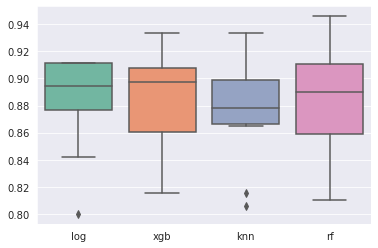

In [87]:
sns.set_style()
score = {}
models = {"log": LogisticRegression(**params_log),
          "xgb": xgb.XGBClassifier(**params_xgb),
          "knn":KNeighborsClassifier(**params_knn),
          "rf": RandomForestClassifier(**params_rf)}
for key, value in models.items():
    score[key] = cross_val_score(value, x_train, y_train,
                                 scoring="f1", cv=10)
score = pd.DataFrame(score)
sns.boxplot(data=score, palette="Set2")

#### Combinaison des modèles

Les modèles de combinaison que nous  
utiliserons sont les suivants :  
- voting
- stacking

In [58]:
## Initialisation des modèles
estimators = [("logit",LogisticRegression(**params_log)),
              ("xgboost", xgb.XGBClassifier(**params_xgb)),
              ("rf",RandomForestClassifier(**params_rf))]

##### Voting

In [38]:
from sklearn.ensemble import VotingClassifier

In [59]:
## Tuning du voting classifier
params_vt = {
    "estimators": estimators,
    "voting": "hard",
    "weights": [.5, .25, .25]
}

##### Stacking

In [42]:
from sklearn.ensemble import StackingClassifier

In [60]:
params_st = {
    "estimators": estimators,
    "final_estimator": LogisticRegression()
}

##### Comparaisons de tous les modèles

In [104]:
acc1 = cross_val_score(StackingClassifier(**params_st), x_train, y_train,
                       scoring="f1", cv=20)
acc2 = cross_val_score(VotingClassifier(**params_vt), x_train, y_train,
                       scoring="f1", cv=20)
score["stacking"] = pd.DataFrame(acc1)
score["voting"] = pd.DataFrame(acc2)

#### Analyse de la stabilité du modèle

Pour cela, nous réalisons une cross-validation des modèles  
en récupérant les différentes précisions au sens du  
f1-score, puis, nous analysons leurs dispersions au  
travers des boxplots ci-dessous

<AxesSubplot:>

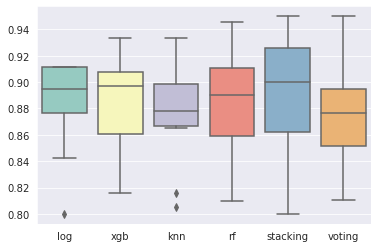

In [106]:
sns.boxplot(data=score, palette="Set3")

En conclusion, nous choisissons le modèle **logistique**  
étant donné qu'il fournit les meilleurs performances  
de prédiction avec une variance raisonnable

#### Entrainement final du modèle logit

In [88]:
model_log = LogisticRegression(**params_log)
model_log.fit(data_b.drop("HeartDisease", axis=1),
              data_b["HeartDisease"])

LogisticRegression(C=0.4444444444444444, penalty='l1', solver='saga')

##### Exportation du modèles

In [92]:
import joblib

In [93]:
joblib.dump(model_log, "./heartDisease.sav")

['./heartDisease.sav']

### Modèle Agnostic du logit

In [98]:
## Nous optons pour une approche agnostic du 
## modèle logit dans le but de comparer les 
## résultat obtenus de cette manière et les 
## odds ratio ainsi que les explications 
## conventionnelles du modèle logit
import shap
model_log1 = LogisticRegression(**params_log)
model_log1.fit(x_train, y_train)
explainer = shap.Explainer(model_log.predict, x_test)
shap_value = explainer(x_test)
shap_values = explainer.shap_values(x_test)

Permutation explainer: 231it [00:15,  5.17it/s]                         


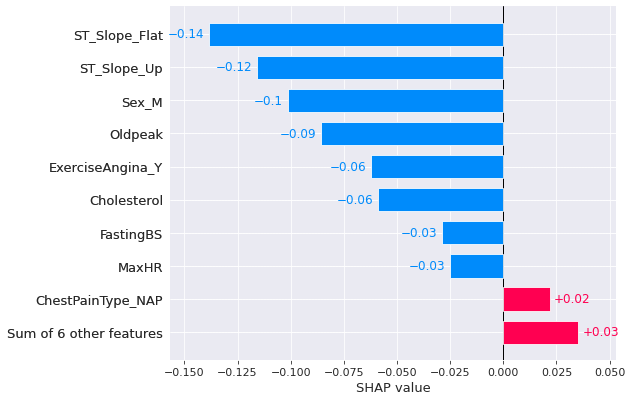

In [107]:
shap.plots.bar(shap_value[0])

L'analyse de la feature importance au sens de la valeur de shapley  
nous montre que la variable la plus importante est le fait d'avoir  
ou non une pente d'exercice maximale plate (ST_Slope_Flat), suivi  
du fait d'avoir ou non une pente d'exercice maximale haute.    
De plus, presque toutes les variables ont une influence negative sur   
la prédiction des maladies cardiovasculaires

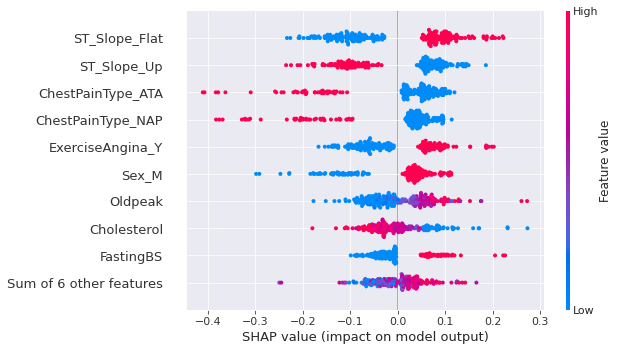

In [100]:
shap.plots.beeswarm(shap_value)

L'analyse du directionnaly impact graph ci-dessus nous montre que:
- Avoir une pente d'exercice plate (st_Slope_Flat), c-à-d ne pas faire assez d'exercices augmente le risque d'être prédit malade
- Avoir une pente d'exercice haute (ST_Slope_Up), c-à-d faire assez d'exercices physiques augmente la probabilité d'être prédit sain